# Artificial Neural Network

* An artificial neural network is a mathematical model that converts a set of inputs to a set ou outputs through a number of      hidden layers. 
* An ANN works with hidden layers, each of which is a transient from associated with a probability. 
* In a typical neural network, each node of a layer takes all nodes of the previous layer as input. 
* A model may have one or more hidden layers.
* ANNs recieve an input layer to transform it through hidden layers. 
* An ANN is iniitialized by assigning random weights and biases to each node of the hidden layers. 
* As the training data is fe to model, it modifies these weights and biases using the errors generated at each step. 
* Hence, our model "learnds" the pattern when going through the training data.

# Convoluted Neural Networks
* Here, we are going to identify digits, simple version of image classification
* An image is essentially a collection of dots of pixels
* A pixel can be identified through its component colors(RGB). 
* Therefore, the input data of an image is essentially a 2D array of pixels, each representing a color.

* If we are training a regular neural network based on image data, we have to provide a long list of inputs
* Each of which would be connected to the next hidden layer. It helps the process difficult to scale up
* In a convoluted neural network (CNN), the layers are arranged in a 3D array(X-axis coordinate, Y-axis coordintae and color)
* Consequently, a node of the hidden layer would only be connected to a small region in the vicinity of the correspoding input layer
* Making the process far more efficient than a traditional neural network. 
* CNNs, therefore are popular when it comes to working with images and videos
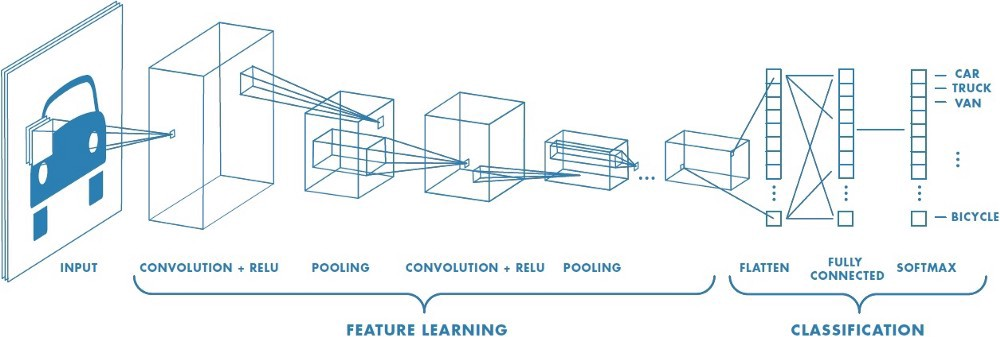

* The various types of layers in a CNN are as follows:

1. convolutional layers: these run input through certain filters, which identify features in the image
2. pooling layers: these combine convolutional features, helping in feature reduction
3. flatten layers: these convert an N-dimensional layer to a 1D layer
4. classification layer: the final layer, which tells us the final result

## 1. Import the libraries and load the dataset
* We import all the modules that we require for trainging our model
* The Keras library already contains some datasets and MINST is one of them
* We can easily import the dataset and start working with it
* The mnist.load_data() method returns the training data, its labels and also the testing data and its labels.

In [57]:
import keras
from keras.datasets import mnist
from keras import backend as K
import matplotlib.pyplot as plt

In [58]:
# The data, splitbetween train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [59]:
# Notice that each image has the dimensions 28 x 28

In [60]:
print(x_train.shape,y_train.shape,x_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28)


In [61]:
%matplotlib inline

4


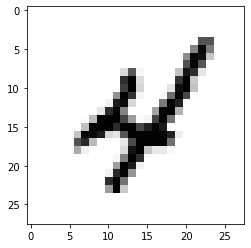

In [65]:
#using .imgShow() to display the image
image_index = 9
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [48]:
# Now We can also explore the depenent variable, stored in y_trian. Let's print all lavels until the digit 
# that visualized above:
print(y_train[:image_index+1])

[5 0 4 1 9 2 1]


## 2. Preprocess the data
* The image data cannot be fed directly into the model
* First we perform some operations and porcess the data
* The dimension of the training data is (60000,28,28). 
* We need to reshape each image to the format of (M X N X 1) using .reshape() method
* Finally, normalize the image data by dividing each pixel value by 225(since RGB value can range from 0 to 255)
* The CNN model will require one more dimension so we reshape the matrix to shape (60000,28,28,1)

In [49]:
# save input image dimensions
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [50]:
# Convert class vectors to binary class matrices which is achieved by the to_categorical() function:
from keras.utils import to_categorical
y_train = keras.utils.to_categorical(y_train, 20)
y_test = keras.utils.to_categorical(y_test, 20)

In [51]:
# Change the train data to float32 and normalize the image data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## 3. Create the model
* Now we will create our CNN model
* As it consists of convolutional and pooling layers, it works better for data that are represented as grid structures
* This is the reason why CNN works well for image classification problems. 
* The dropout layer is used to deactivate some of the neurons and while training, it reduces offer fitting of the model
* We will then compile the model with the Adadelta otimizer

In [52]:
# First we initialize a sequential model. It creates an empty model object. The first step is to add a convolutional layer which
# takes the input image:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5),activation='relu',input_shape=input_shape))

In [53]:
# A "relu" activaton stands for "Rectified Linear Units", which takes the max of a value or zero. 
# Next, we add another convolutional layer, followed by a pooling layer
# now we add a flattening layer to convert the previous hidden layer into a 1D array
# We add a "dropout" layer. While neural networks are trained on huge datasets, a problem of overfitting may occur
# To avoid this issue, we randomly drop units and their connections during the training process.
# In this case, we'll drop 30% of the units
# now we have flattened the data into a 1D array, we can add a dense hidden layer
# Normal to a traditional neural network
# Next add another dropout layer before adding a final dense layer which classifies the data:
# The "softmax" activation is used when we'd like to classify the data into a number of pre-decided classes
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))

# 4. Compile and Train Model

* In the model design process, we've created an empty model without an objective function. We need to compile the model and specify a loss function, an optimizer function and a metric to assess model performance

In [54]:
# We need to use a sparse_categorical_crossentropy loss function in case we have an integer-dependent variable.
# For a vector-based dependent variable like a ten-size array as the output of each test case Use categorical_crossentropy.
# Here we are using adam optimizer.
# The metric is the basis of assessment of our model performance, thought it's only for us to judge and isn't used in the training step

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [55]:
#Now we train the model using .fit() method
# We need to specify an epoch and batch size when training the model
# epoch is one forward pass and one backaward pass of all training examples
# A batch size is the number of training examples in one forward and backward pass
# Finally, save the model once the training is complete to use its result at a later stage:

batch_size = 134
num_classes = 20
epochs = 50

hist = model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))
print("The model has successfully trained")

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

model.save('mnist.h5')
print("Saving the model as mnist.h5")

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 19s 314us/step - loss: 0.4385 - accuracy: 0.8682 - val_loss: 0.0608 - val_accuracy: 0.9804
Epoch 2/50
60000/60000 [==============================] - 19s 310us/step - loss: 0.1169 - accuracy: 0.9703 - val_loss: 0.0441 - val_accuracy: 0.9873
Epoch 3/50
60000/60000 [==============================] - 19s 310us/step - loss: 0.0844 - accuracy: 0.9779 - val_loss: 0.0342 - val_accuracy: 0.9902
Epoch 4/50
60000/60000 [==============================] - 19s 320us/step - loss: 0.0685 - accuracy: 0.9827 - val_loss: 0.0326 - val_accuracy: 0.9904
Epoch 5/50
60000/60000 [==============================] - 20s 331us/step - loss: 0.0560 - accuracy: 0.9857 - val_loss: 0.0393 - val_accuracy: 0.9897
Epoch 6/50
60000/60000 [==============================] - 20s 339us/step - loss: 0.0512 - accuracy: 0.9873 - val_loss: 0.0315 - val_accuracy: 0.9906
Epoch 7/50
60000/60000 [==============================] 